In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [5]:
df = df[df['prodejce'] == 'RJ']

In [7]:
df = df[df['predstih_d'] >= 0]

In [9]:
def filtr(dopravce, mesto1, mesto2):
    dfc = df.copy()
    dfc = dfc[dfc['prodejce'] == dopravce]
    dfc = dfc[dfc['odkud'].str.contains(mesto1) | dfc['kam'].str.contains(mesto1)]
    dfc = dfc[dfc['odkud'].str.contains(mesto2) | dfc['kam'].str.contains(mesto2)]
    minimum_prestupu = dfc['prestupy'].min()
    if minimum_prestupu == -1:
        minimum_prestupu = 0
    print(f"Nejmenší počet přestupů: {minimum_prestupu}.")
    minimum_casu = dfc['jizdni_doba'].min()
    print(f"Nejrychlejší jízdní doba: {minimum_casu} min.")
    dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]
    dfc = dfc.drop_duplicates(subset=['odjezd','kam','predstih_d'], keep='last')
    return dfc.reset_index(drop=True)

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 148.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

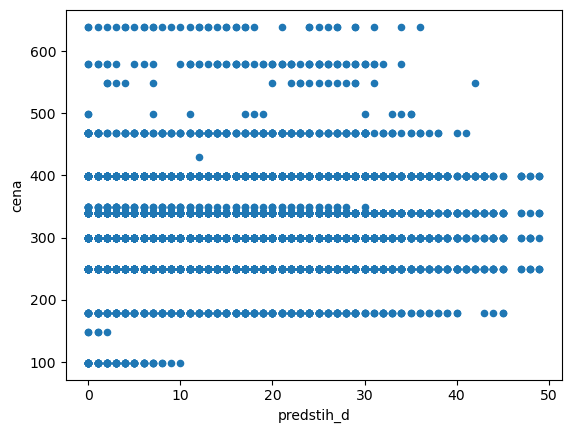

In [11]:
filtr("RJ","Brno","Praha").groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 148.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='volnych_mist', ylabel='cena'>

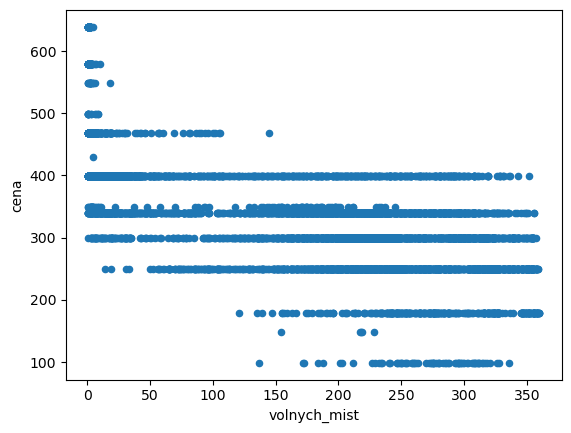

In [13]:
filtr("RJ","Brno","Praha").groupby('volnych_mist')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="volnych_mist",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 128.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

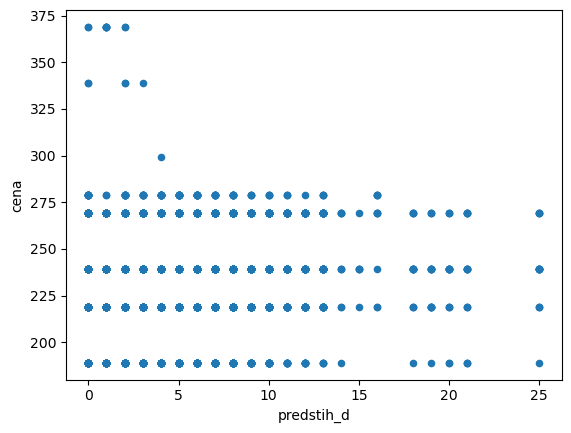

In [15]:
filtr("RJ","Brno","Ostrav").groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 185.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

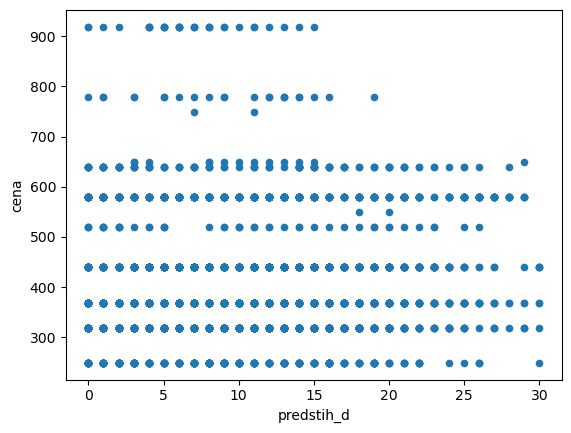

In [17]:
filtr("RJ","Praha","Ostrava").groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 645.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

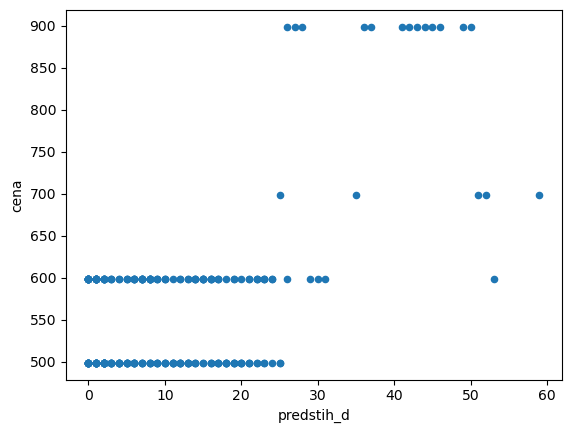

In [19]:
filtr("RJ","Praha","Čop").groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 348.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

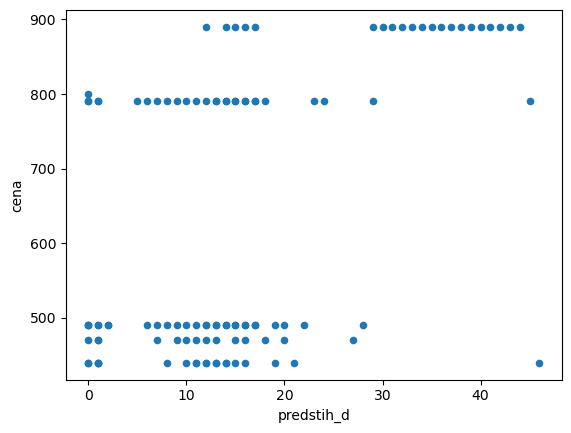

In [21]:
filtr("RJ","Praha","Krako").groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 348.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='volnych_mist', ylabel='cena'>

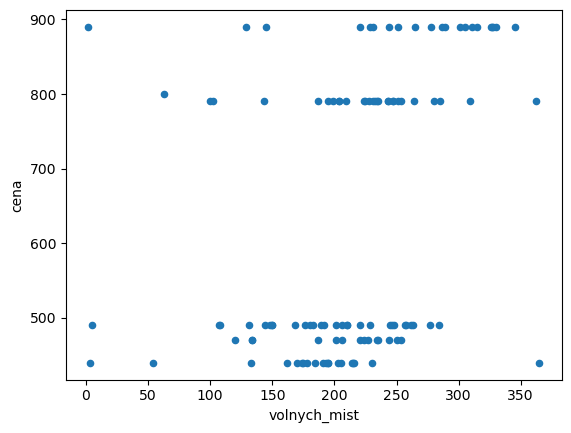

In [23]:
filtr("RJ","Praha","Krako").groupby('volnych_mist')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="volnych_mist",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 645.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_40252\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='volnych_mist', ylabel='cena'>

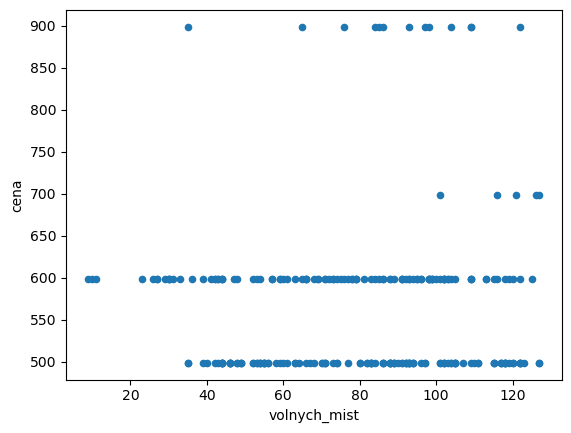

In [27]:
filtr("RJ","Praha","Čop").groupby('volnych_mist')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="volnych_mist",y="cena")